# Importing packages

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Dataset Overview

In [2]:
raw_data = pd.read_csv('./car_evaluation.csv')

In [3]:
raw_data.shape

(1728, 7)

In [4]:
raw_data.head()

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying price       1728 non-null   object
 1   maintenance cost   1728 non-null   object
 2   number of doors    1728 non-null   object
 3   number of persons  1728 non-null   object
 4   lug_boot           1728 non-null   object
 5   safety             1728 non-null   object
 6   decision           1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
raw_data.columns = raw_data.columns.str.replace(' ', '_')

In [7]:
raw_data.columns

Index(['buying_price', 'maintenance_cost', 'number_of_doors',
       'number_of_persons', 'lug_boot', 'safety', 'decision'],
      dtype='object')

# __Exploratory Data Analysis__

In [8]:
data = raw_data.copy(deep=True)

In [9]:
numcols = data.select_dtypes(exclude=['object']).columns
objcols = data

In [10]:
def valuecounts(x):
     return data[x].value_counts()

In [11]:
valuecounts('number_of_persons')

2       576
4       576
more    576
Name: number_of_persons, dtype: int64

<AxesSubplot: xlabel='number_of_persons', ylabel='count'>

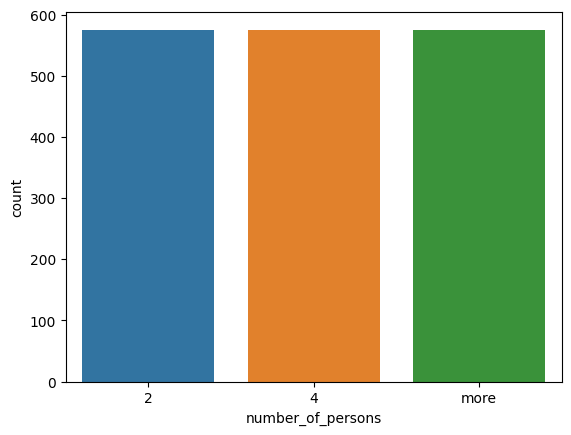

In [12]:
sns.countplot(data=data, x='number_of_persons')

## Missing Values

In [13]:
data.isna().sum()

buying_price         0
maintenance_cost     0
number_of_doors      0
number_of_persons    0
lug_boot             0
safety               0
decision             0
dtype: int64

In [14]:
data.duplicated().sum()

0

## Encoding

In [15]:
objcol = data.select_dtypes('object').columns

In [16]:
from sklearn.preprocessing import OrdinalEncoder
encode = OrdinalEncoder()
data[objcol] = encode.fit_transform(data[objcol].values)

In [17]:
data

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
0,3.0,3.0,0.0,0.0,2.0,1.0,2.0
1,3.0,3.0,0.0,0.0,2.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,1.0,2.0
4,3.0,3.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1724,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1725,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1726,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [18]:
x = data.drop("decision",axis=1)
y = data["decision"]

### Splitting

In [62]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=True)

### Train the model

In [63]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

### finding accuracy

In [64]:
trainacc = model.score(xtrain, ytrain)
testacc = model.score(xtest, ytest)

pd.DataFrame([trainacc*100, testacc*100], index=['Train Accuracy', 'Test Accuracy'], columns=['Value'])

,Value
Train Accuracy,97.105045
Test Accuracy,91.522158
